<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [4]:
### YOUR CODE STARTS HERE
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-08-07 01:02:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-08-07 01:02:49 (605 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [34]:
import pandas as pd
# Making a list of missing values
missing_values = ["?"]
df = pd.read_csv('house-votes-84.data', na_values = missing_values, header=None)
print(df.shape)
df.head()

(435, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
columns = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution',
           'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban',
           'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending',
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

In [36]:
df.columns = columns
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [37]:
df.isna().sum()

party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [71]:
# okay, lets just drop the NA for now and we'll see if we can find a better solution later
# potentially we can just drop the last column since that is removing half our dataset when we drop the null values
df2 = df.dropna()
df2.isna().sum()

party                                     0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

In [39]:
print(df2.shape)
df2.head()

(232, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
19,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
23,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [51]:
df3 = df.drop('export-administration-act-south-africa', axis=1)
df3 = df.dropna()
print(df3.shape)
df3.head()

(232, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
19,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
23,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [61]:
df2.dtypes

party                                     object
handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missile                                object
immigration                               object
synfuels-corporation-cutback              object
education-spending                        object
superfund-right-to-sue                    object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
dtype: object

### Ttests for each feature in the dataframe

In [85]:
import numpy as np
for feat in df2.columns:
  #df2[feat].eq('y').mul(1)
  df2[feat].replace(to_replace=['n', 'y'], value=[0, 1], inplace=True)
df2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


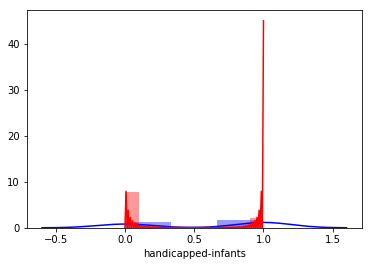

In [93]:
import seaborn as sns

sns.distplot(df2[df2['party'] == 'democrat']['handicapped-infants'], color = 'b')
sns.distplot(df2[df2['party'] == 'republican']['handicapped-infants'], color = 'r');

In [90]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
tstat, pvalue = ttest_ind(df2[df2['party'] == 'democrat']['handicapped-infants'], df2[df2['party'] == 'republican']['handicapped-infants'])
print(tstat)
print(pvalue)

6.240907554031057
2.0722024876891192e-09


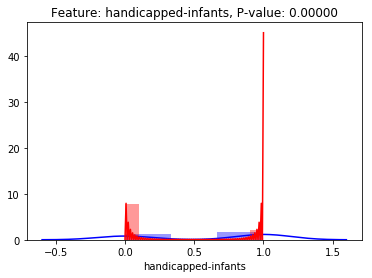

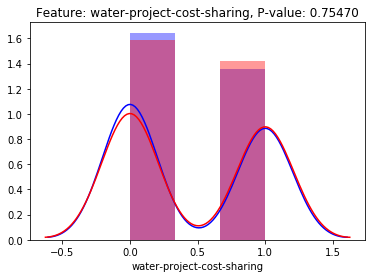

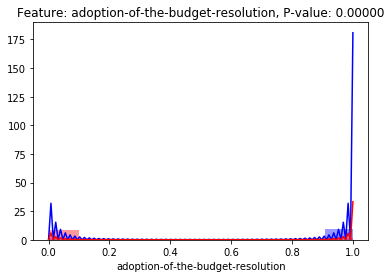

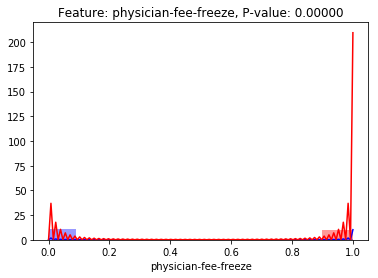

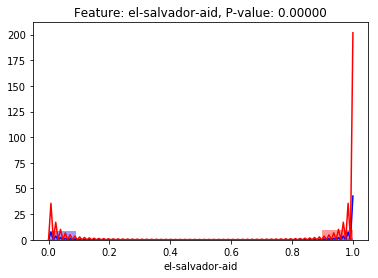

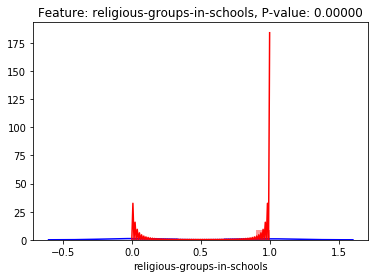

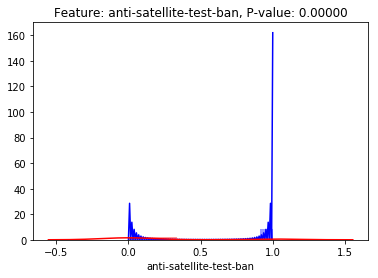

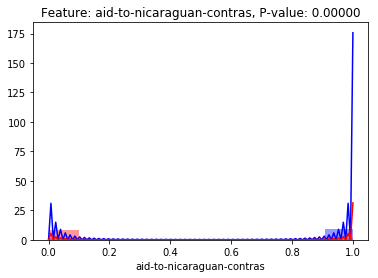

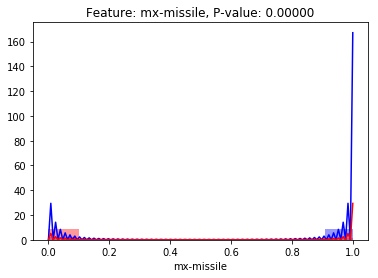

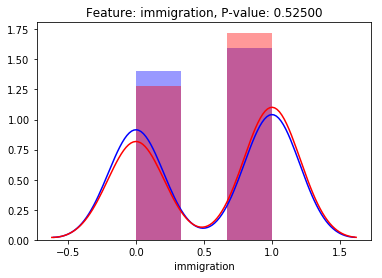

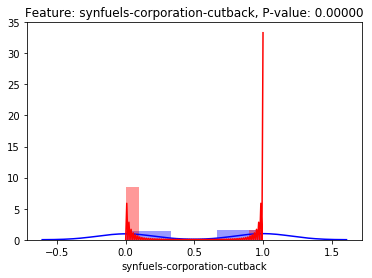

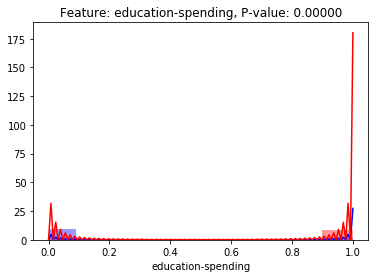

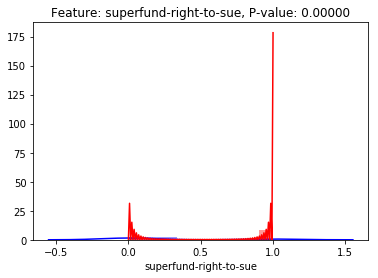

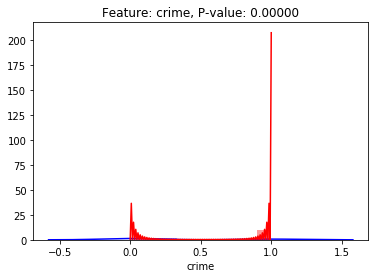

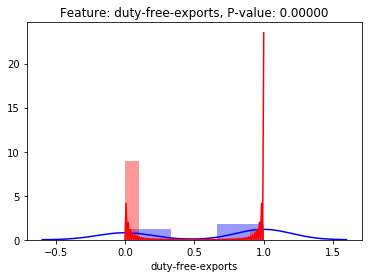

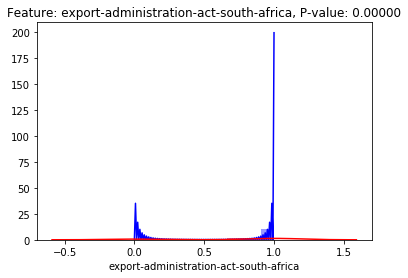

<Figure size 432x288 with 0 Axes>

In [99]:
# meh it's the same.. we'll just deal with df2.
import matplotlib.pyplot as plt
columns2 = ['handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution',
           'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban',
           'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending',
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']
for feat in df2[columns2]:
  dems = df2[df2['party'] == 'democrat'][feat]
  reps = df2[df2['party'] == 'republican'][feat]

  # Plot distribution
  sns.distplot(dems, color = 'b')
  sns.distplot(reps, color = 'r');

  # Run t-test
  _, pvalue = ttest_ind(dems, reps)

  # Plot
  plt.title(f'Feature: {feat}, P-value: {pvalue:.5f}')
  plt.figure();

### How do we interpret this?

Well, the ttest measures whether or not there is a significant difference between the two samples that we pass to the parameters in the ttest_ind function. So, we are asking if democrats and republicans voted differently on each of the issues above. The null hypothesis here is that both groups vote the same way. If we have a **large** p value, we cannot reject the null hypothesis of both groups voting the same. If we have a **small** p value then we reject the null hypothesis and say that the groups voted differently. 

### What is one issue where democrats said yes more than republicans with a p<0.01?

* Adoption of the budget resolution





### What is one issue where republicans said yes more than democrats with a p<0.01?

* Physican fee freeze

### What is one issue where there was no difference in how the two groups voted p>0.1

* Water project cost sharing


# Stretch goals

Refactor your code into functions so it's easy to rerun with arbitrary variables
Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [102]:
print(df2['handicapped-infants'].dtype == 'int64')

True


In [0]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import pandas as pd
import numpy as np

def convert_to_int(df):
  for feat in df.columns:
    df[feat].replace(to_replace=['n', 'y'], value=[0, 1], inplace=True)

def clean_data(df):
  for feat in df.columns:
    if df[feat].dtype != 'object':
      df[feat].fillna(df[feat].mode()[0], inplace=True)
      
def plot_ttest(df2):
  for feat in df2.columns:
    if df2[feat].dtype != 'object':
      dems = df2[df2[0] == 'democrat'][feat]
      reps = df2[df2[0] == 'republican'][feat]

      # Plot distribution
      sns.distplot(dems, color = 'b')
      sns.distplot(reps, color = 'r');

      # Run t-test
      _, pvalue = ttest_ind(dems, reps)

      # Plot
      plt.title(f'Feature: {feat}, P-value: {pvalue:.5f}')
      plt.figure();

In [126]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


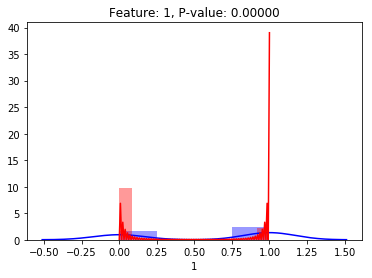

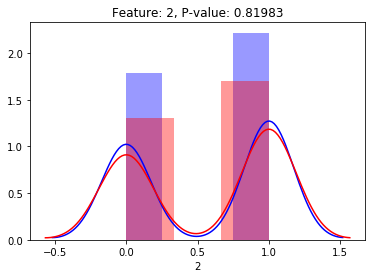

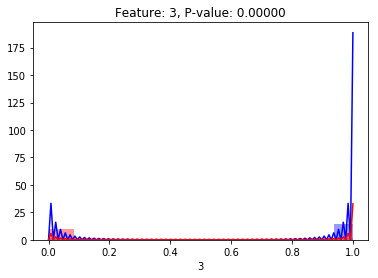

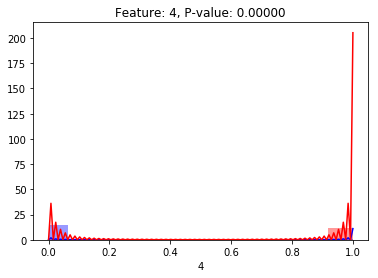

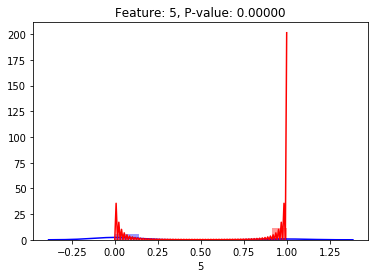

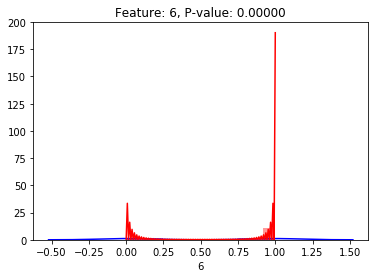

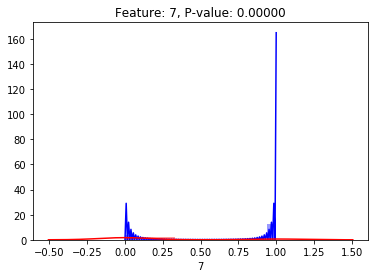

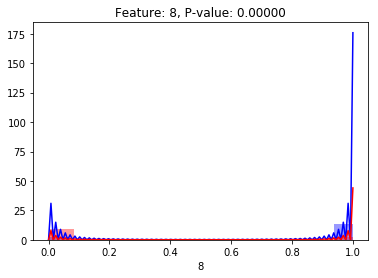

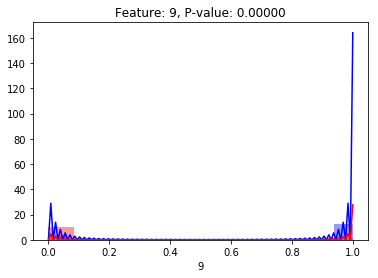

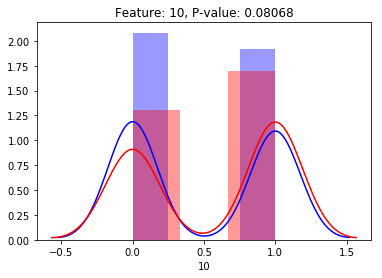

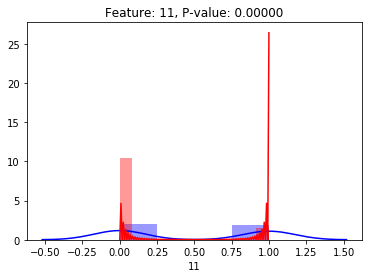

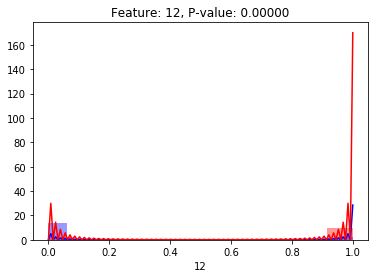

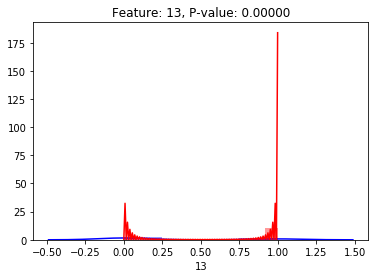

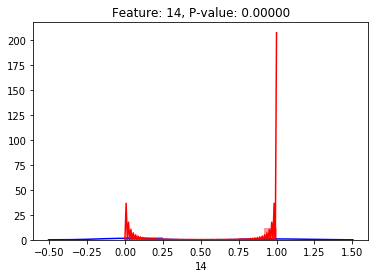

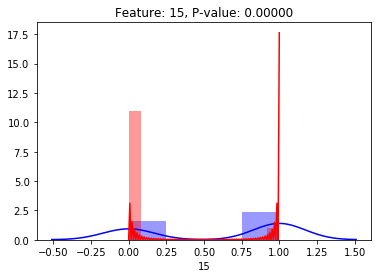

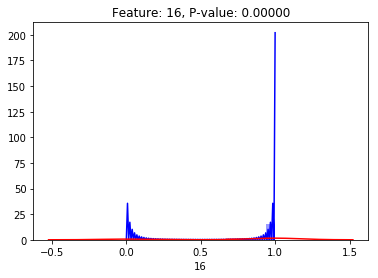

<Figure size 432x288 with 0 Axes>

In [127]:
test = pd.read_csv('house-votes-84.data', na_values = missing_values, header=None)
convert_to_int(test)
clean_data(test)
plot_ttest(test)

In [0]:
# now lets combine all the functions into one

def everything_in_one(df):
  convert_to_int(df)
  clean_data(df)
  plot_ttest(df)


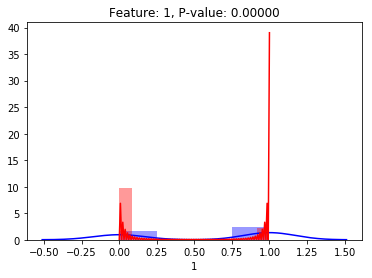

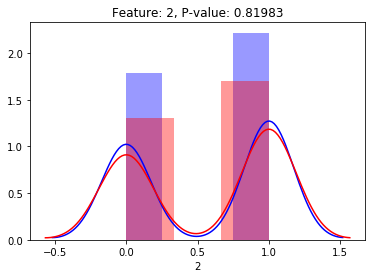

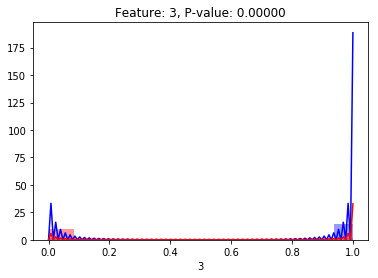

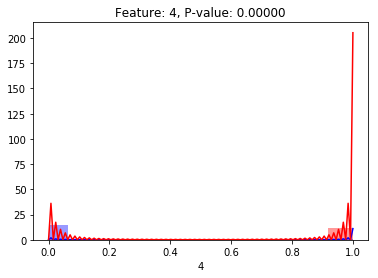

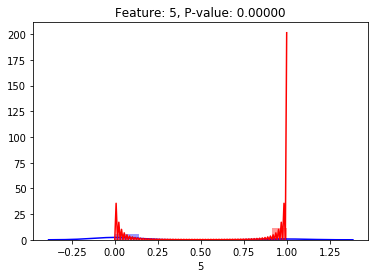

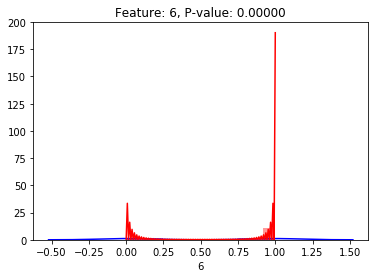

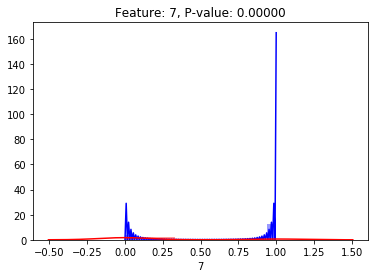

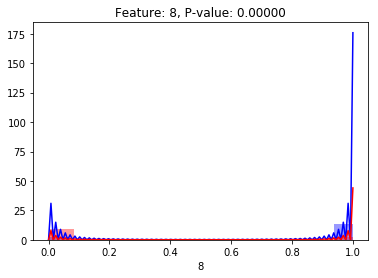

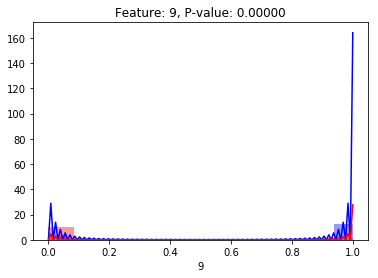

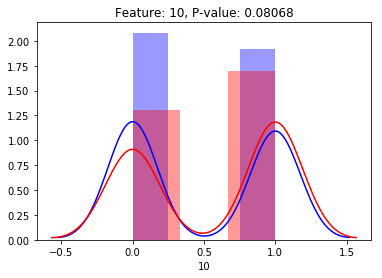

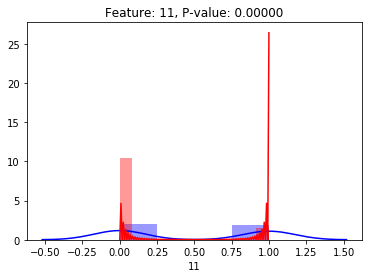

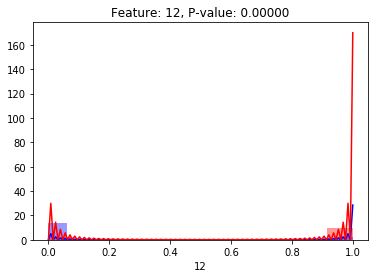

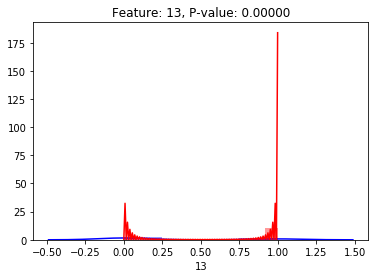

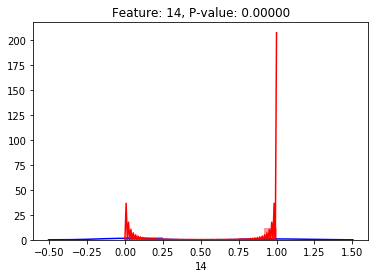

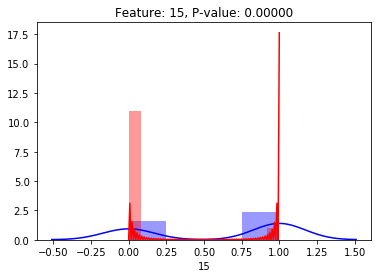

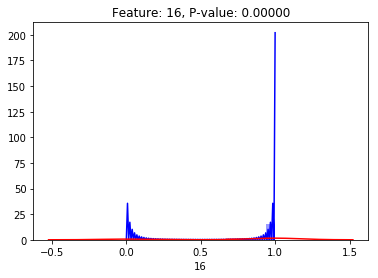

<Figure size 432x288 with 0 Axes>

In [130]:
test2 = pd.read_csv('house-votes-84.data', na_values = missing_values, header=None)
everything_in_one(test2)